<img src="https://i.imgur.com/BgsBICA.png" style="width:100%">

<div style="font-size:15px; text-align:justify">
<p>This notebook is using the <em><strong>Red Wine Quality Dataset</strong></em> from the UCI MACHINE LEARNING in which the two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).</p>

<p>In this notebook we will do <em><strong>Exploratory Data Analysis</strong></em> then <em><strong>Classification</strong></em> with some <em><strong>Prediction</strong></em> of the Quality of Red Wine.</p>

</div>


<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>Table of Contents</em> </span></h2>
</div>
<br><br>

1. [Data Exploration](#dataE)
2. [Feature Enginnering](#featE)<br>
    2.1. [Lets scale the Wine](#featE_scale_wine)<br>
    2.2. [Sampling the Data](#featE_skw)<br> 
3. [Data Visualisation](#dataV)<br>
    3.1. [Visualize the fixed acidity contents in red wine](#dataV1)<br>
    3.2. [Visualize the volatile acidity contents in red wine](#dataV2)<br>
    3.3. [Visualize the citric acid contents in red wine](#dataV3)<br>
    3.4. [Visualize the residual sugar contents in red wine](#dataV4)<br>
    3.5. [Visualize the chlorides contents in red wine](#dataV5)<br>
    3.6. [Visualize the free sulfur dioxide contents in red wine](#dataV6)<br>
    3.7. [Visualize the total sulfur dioxide contents in red wine](#dataV7)<br>
    3.8. [Visualize the density contents in red wine](#dataV8)<br>
    3.9. [Visualize the pH contents in red wine](#dataV9)<br>
    3.10. [Visualize the sulphates contents in red wine](#dataV10)<br>
    3.11. [Visualize the alcohol contents in red wine](#dataV11)<br>
    3.12. [Visualize the Correlation contents in red wine](#dataV12)<br>
    3.13. [Visualize the Relationships between variables contents in red wine](#dataV13)<br>
4. [Preprocessing](#dataPrep)<br>
    4.1. [Feature Scaling](#dataPrep_fScale)<br>
    4.2. [Train, test split](#dataPrep_split)<br>
5. [Models](#model)<br>
    5.1. [Decision Tree](#model1)<br>
    5.2. [Random Forest](#model2)<br>
    5.3. [Cross Validation Score](#model3)<br>
    5.3.a. [Logistic Regression Cross Validation Accuracy score](#model3a)<br>
    5.3.b. [Decision Tree Classifier Cross Validation Accuracy score](#model3b)<br>
    5.3.c. [Random Forest Classifier Cross Validation Accuracy score](#model3c)<br>
    5.3.d. [Xgboost Classifier Cross Validation Accuracy score](#model3d)<br>
    5.3.e. [Model Scores using Cross Validation score](#model3e)<br>
    5.4. [Voting Classifier](#model4)<br>
    5.5. [Grid Search CV](#model5)<br>
    5.5.a. [Random Forest Classifier using Grid Search CV](#model5a)<br>
    5.5.b. [Xgboost Classifier using Grid Search CV](#model5a)<br>
6. [Conclusion](#conclusion)

<p style="text-align:center"><img src="https://i.imgur.com/ugj24t1.png" style="width:30%"></p>

<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

palette = sns.color_palette("Spectral")


import warnings
warnings.filterwarnings("ignore")

<a id="dataE"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>1. Data Exploration</em> </span></h2>
</div>

In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
df.head(10).style.set_properties(**{'background-color': '#F6FBFC','color': '#000','border': '1px solid #000000'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<a id="featE"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>2. Feature Enginnering</em> </span></h2>
</div>

<a id="featE_scale_wine"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>2. 1. Lets <strong>scale</strong> the Wine</em> </span></h3>
</div>

So, after reading the ***Red Wine Quality*** dataset description we got that;<br>

**quality > 6.5 is "*good*"**<br>
**quality < 6.5 is "*bad*"**<br>

good --> 1<br>
bad  ---> 0<br>

In [6]:
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

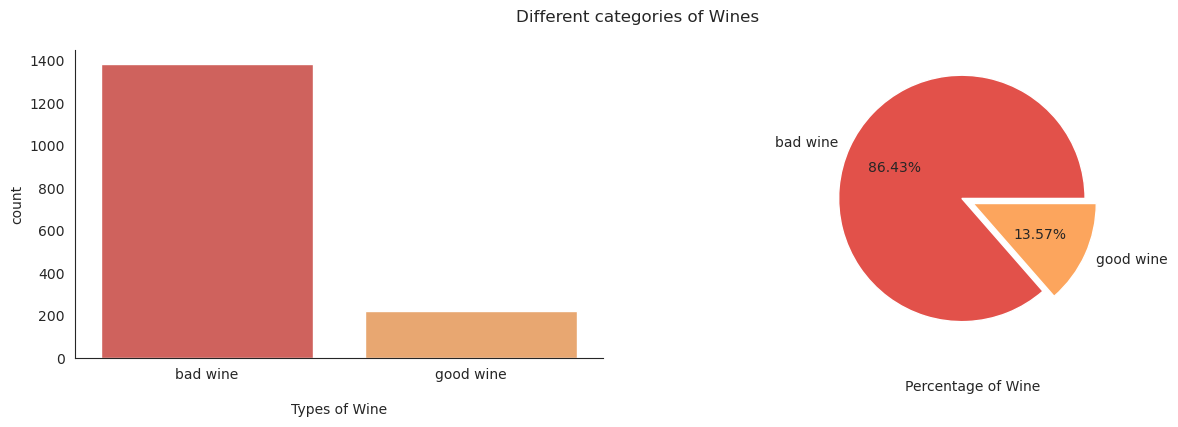

In [7]:
sns.set_style("white")
plt.figure(figsize=(15, 4))

wineScale_insight = df['quality']

plt.subplot(1, 2, 1)
sns.countplot(df, x=wineScale_insight, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nTypes of Wine")


plt.subplot(1, 2, 2)
plt.pie(wineScale_insight.value_counts().values, labels=['bad wine', 'good wine'], autopct="%.2f%%", explode=[0.1, 0], colors=palette)
plt.xlabel("\nPercentage of Wine")

plt.suptitle('Different categories of Wines')
sns.despine()

<a id="featE_skw"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>2. 2. Sampling the Data</em> </span></h3>
</div>

So from the above visualization we can see that the Dataset is ***skewed or unbalanced***, now what we can do is to Over Sample the minority class using ***Synthetic Minority Oversampling Technique (SMOTE)***

In [8]:
X = df.drop(['quality'], axis=1)
y = df.quality

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

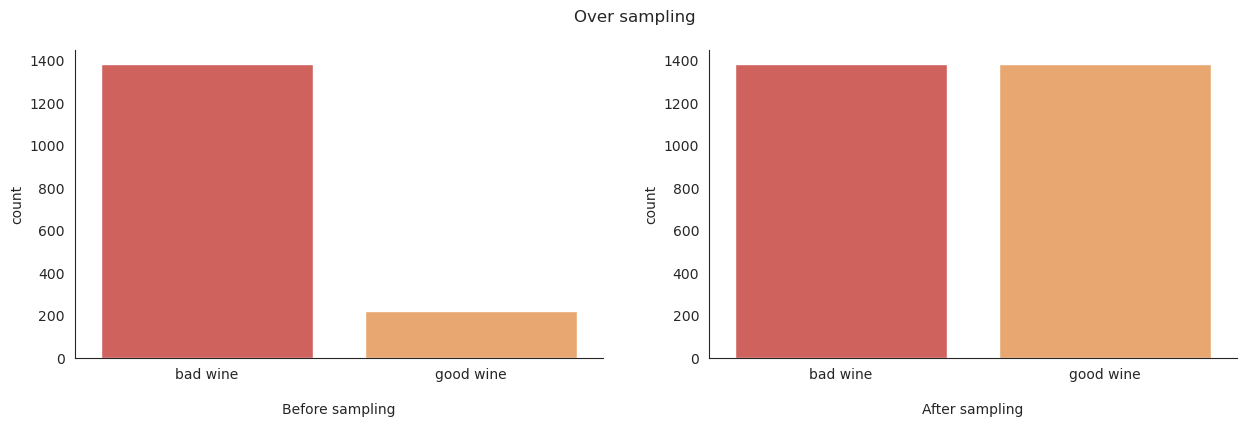

In [10]:
sns.set_style("white")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='quality', palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nBefore sampling")

plt.subplot(1, 2, 2)
sns.countplot(x=y_smote, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nAfter sampling")

plt.suptitle('Over sampling \n\n\n')

sns.despine()

<a id="dataV"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. Data Visualizations</em> </span></h2>
</div>

In [11]:
def viz_insights(field):
    plt.figure(figsize=(15, 5))
    sns.histplot(data=df, x=field, hue="quality", kde=True, palette=palette, bins=20, multiple="stack", alpha=.3)
    plt.legend(['bad wine', 'good wine'])
    if field == "density": plt.title(f"\n{field.capitalize()} of red wine\n\n")
    else: plt.title(f"\n{field} contents in red wine\n\n")
    plt.figtext(0.75, 0.3, f'{df[field].describe()}')
    sns.despine()

<a id="dataV1"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 1. Visualize the <strong>fixed acidity</strong> contents in red wine</em> </span></h3>
</div>

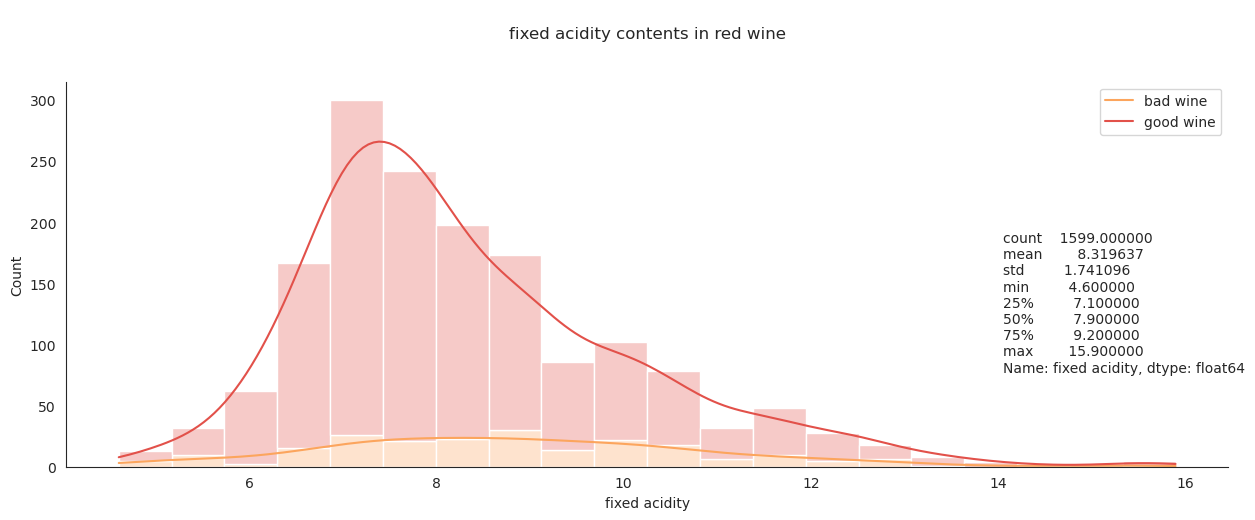

In [12]:
viz_insights("fixed acidity")

<a id="dataV2"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 2. Visualize the <strong>volatile acidity</strong> contents in red wine</em> </span></h3>
</div>

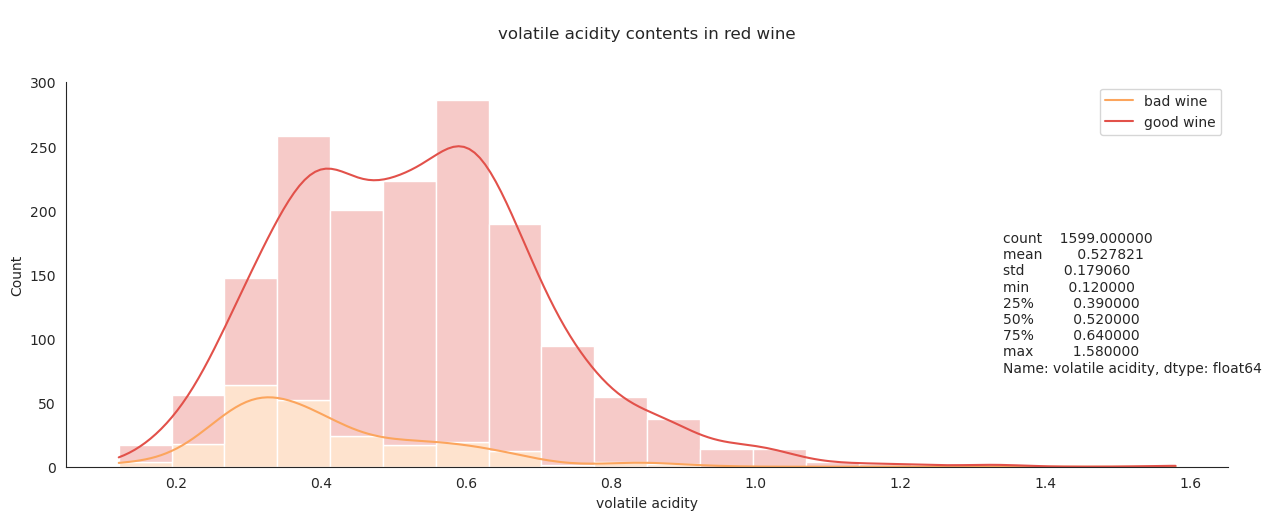

In [13]:
viz_insights("volatile acidity")

<a id="dataV3"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 3. Visualize the <strong>citric acid</strong> contents in red wine</em> </span></h3>
</div>

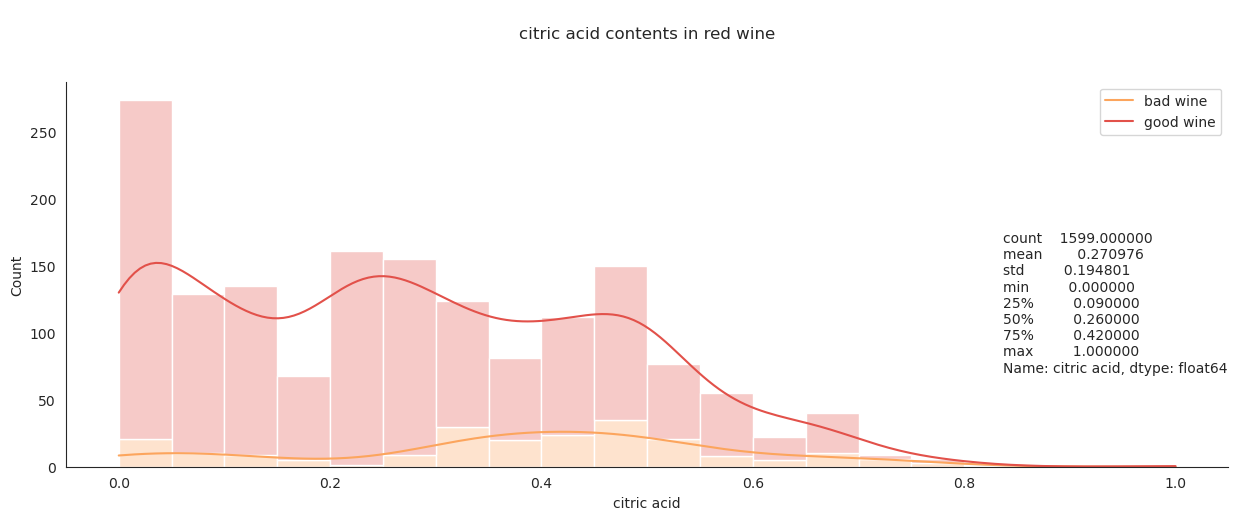

In [14]:
viz_insights("citric acid")

<a id="dataV4"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 4. Visualize the <strong>residual sugar</strong> contents in red wine</em> </span></h3>
</div>

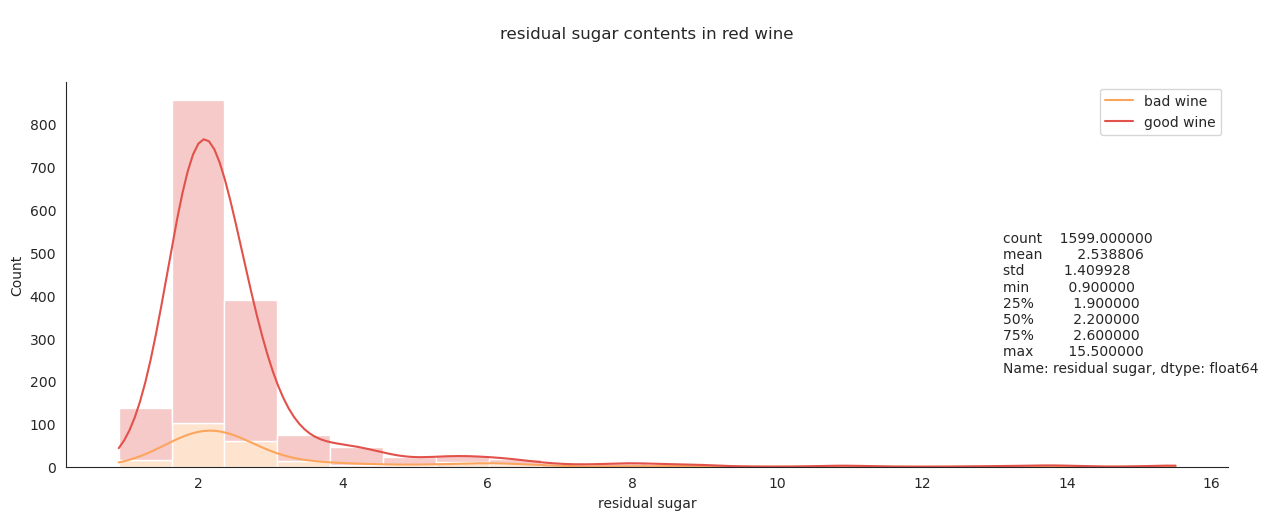

In [15]:
viz_insights("residual sugar")

<a id="dataV5"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 5. Visualize the <strong>chlorides</strong> contents in red wine</em> </span></h3>
</div>

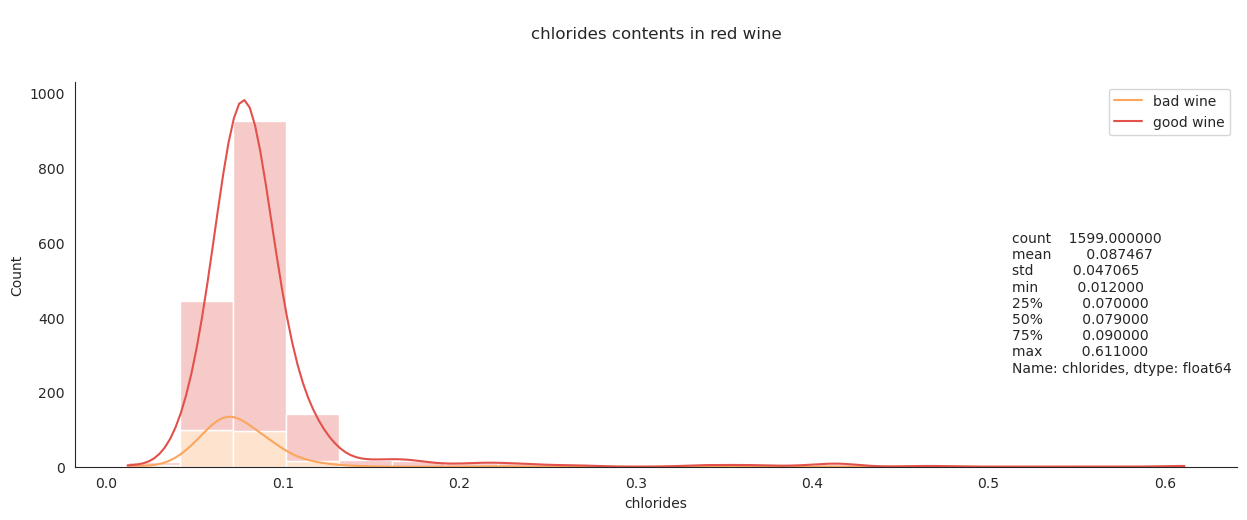

In [16]:
viz_insights("chlorides")

<a id="dataV6"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 6. Visualize the <strong>free sulfur dioxide</strong> contents in red wine</em> </span></h3>
</div>

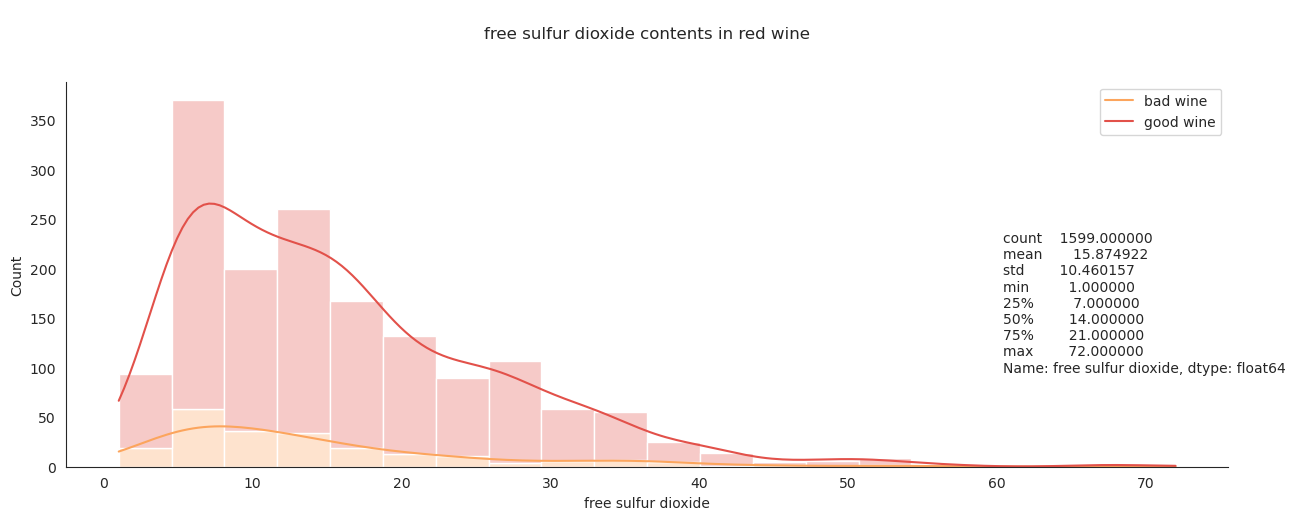

In [17]:
viz_insights("free sulfur dioxide")

<a id="dataV7"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 7. Visualize the <strong>total sulfur dioxide</strong> contents in red wine</em> </span></h3>
</div>

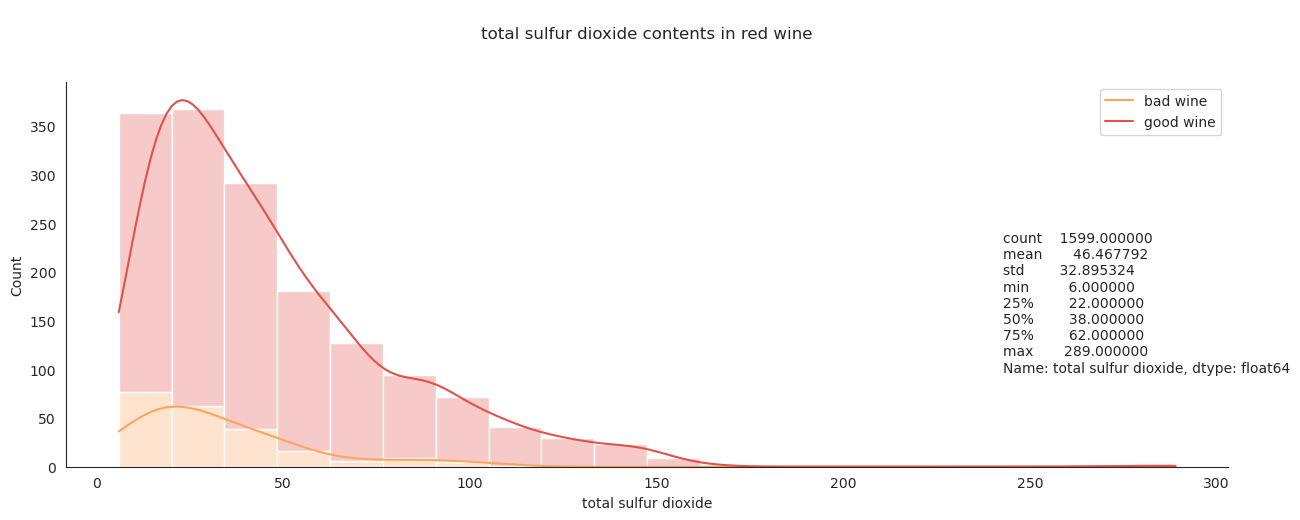

In [18]:
viz_insights("total sulfur dioxide")

<a id="dataV8"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 8. Visualize the <strong>density</strong> contents in red wine</em> </span></h3>
</div>

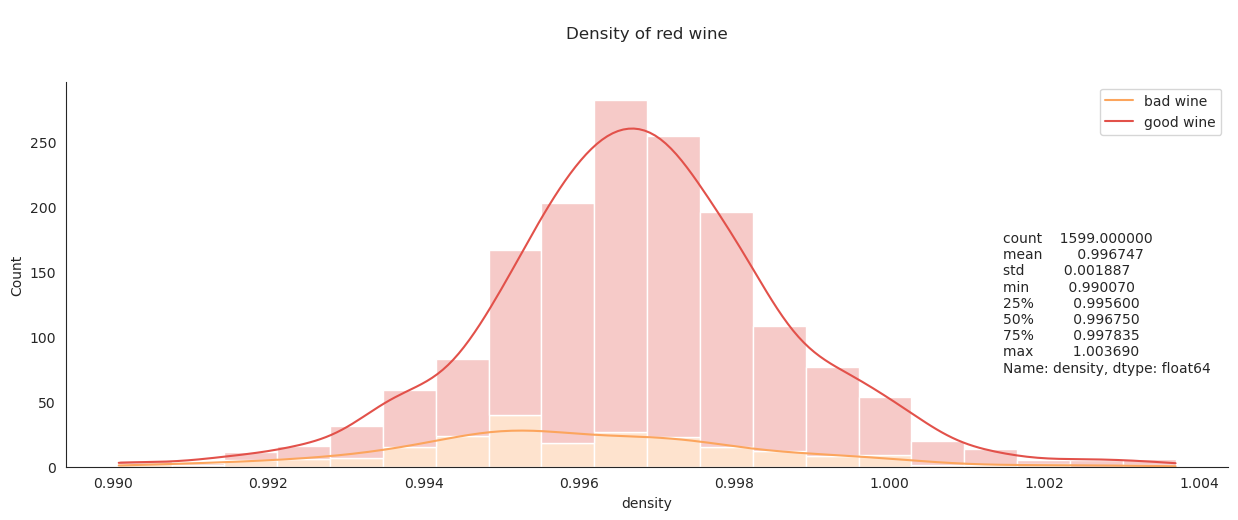

In [19]:
viz_insights("density")

<a id="dataV9"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 9. Visualize the <strong>pH</strong> contents in red wine</em> </span></h3>
</div>

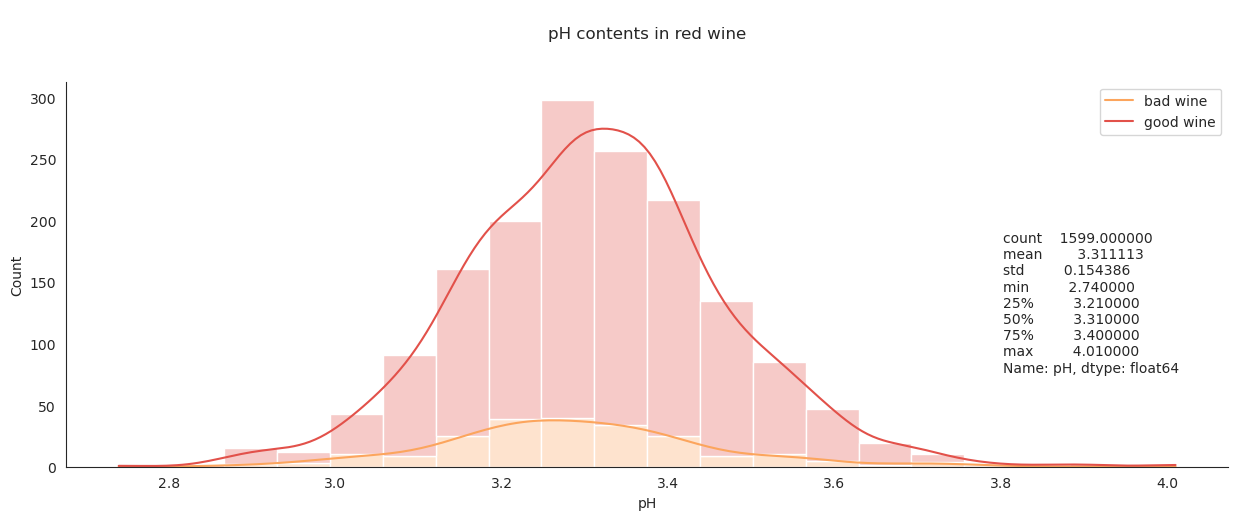

In [20]:
viz_insights("pH")

<a id="dataV10"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 10. Visualize the <strong>sulphates</strong> contents in red wine</em> </span></h3>
</div>

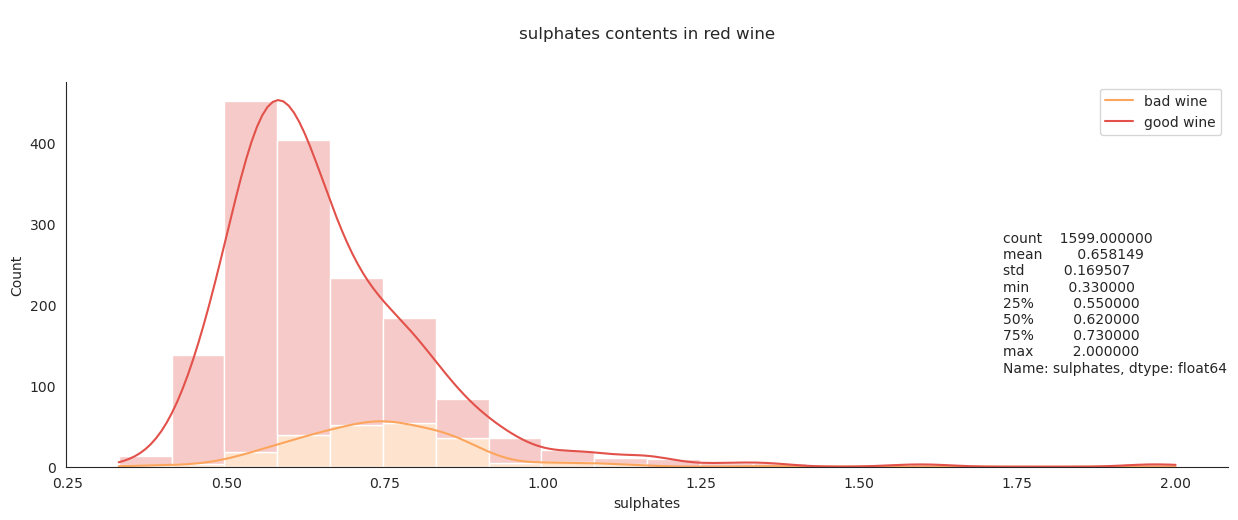

In [21]:
viz_insights("sulphates")

<a id="dataV11"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 11. Visualize the <strong>alcohol</strong> contents in red wine</em> </span></h3>
</div>

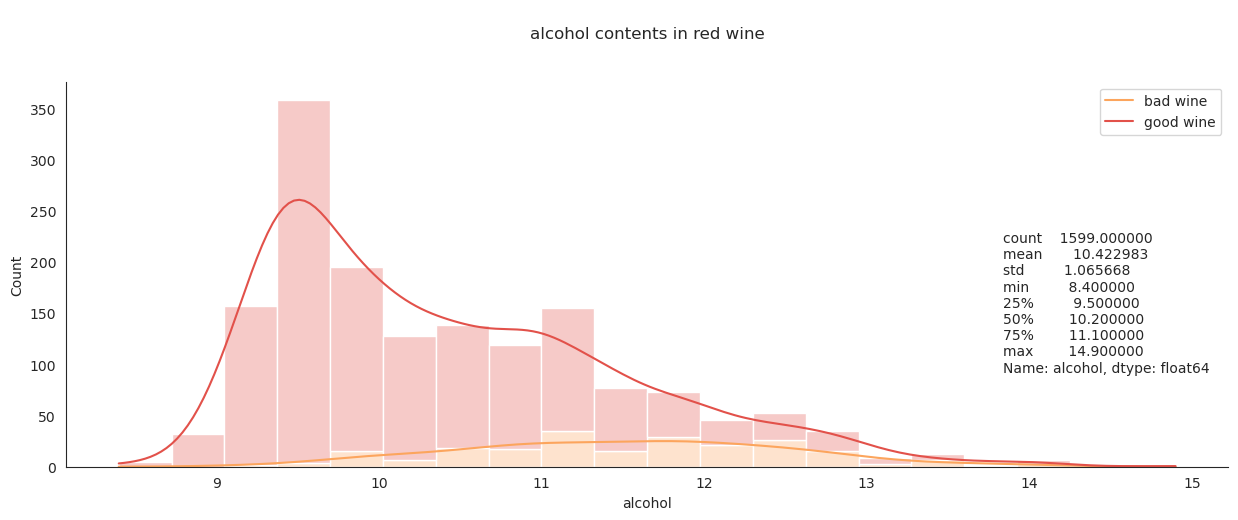

In [22]:
viz_insights("alcohol")

<a id="dataV12"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 12. Visualize the <strong>Correlation</strong> contents in red wine</em> </span></h3>
</div>

In [23]:
df.corr().style.background_gradient(cmap=plt.cm.Spectral)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


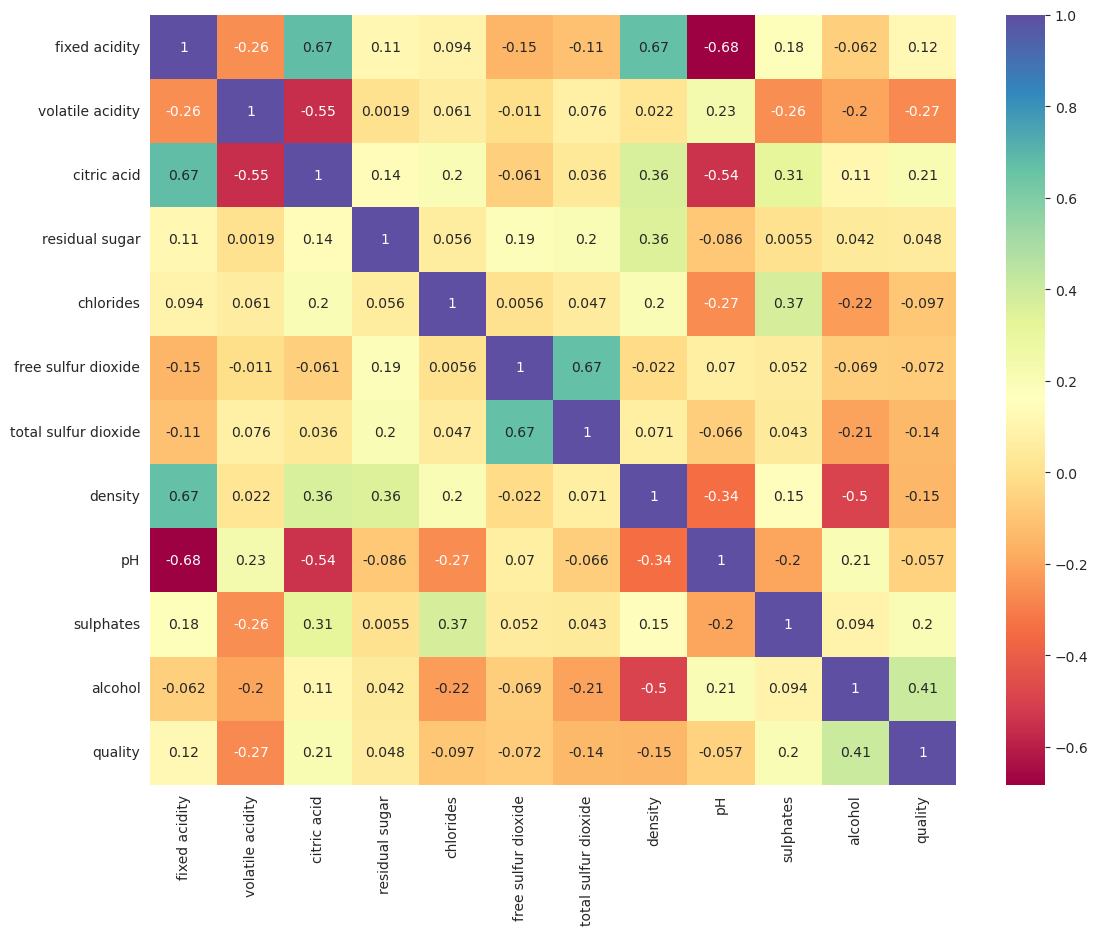

In [24]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

<a id="dataV13"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>3. 13. Visualize the <strong>Relationships between variables</strong> contents in red wine</em> </span></h3>
</div>

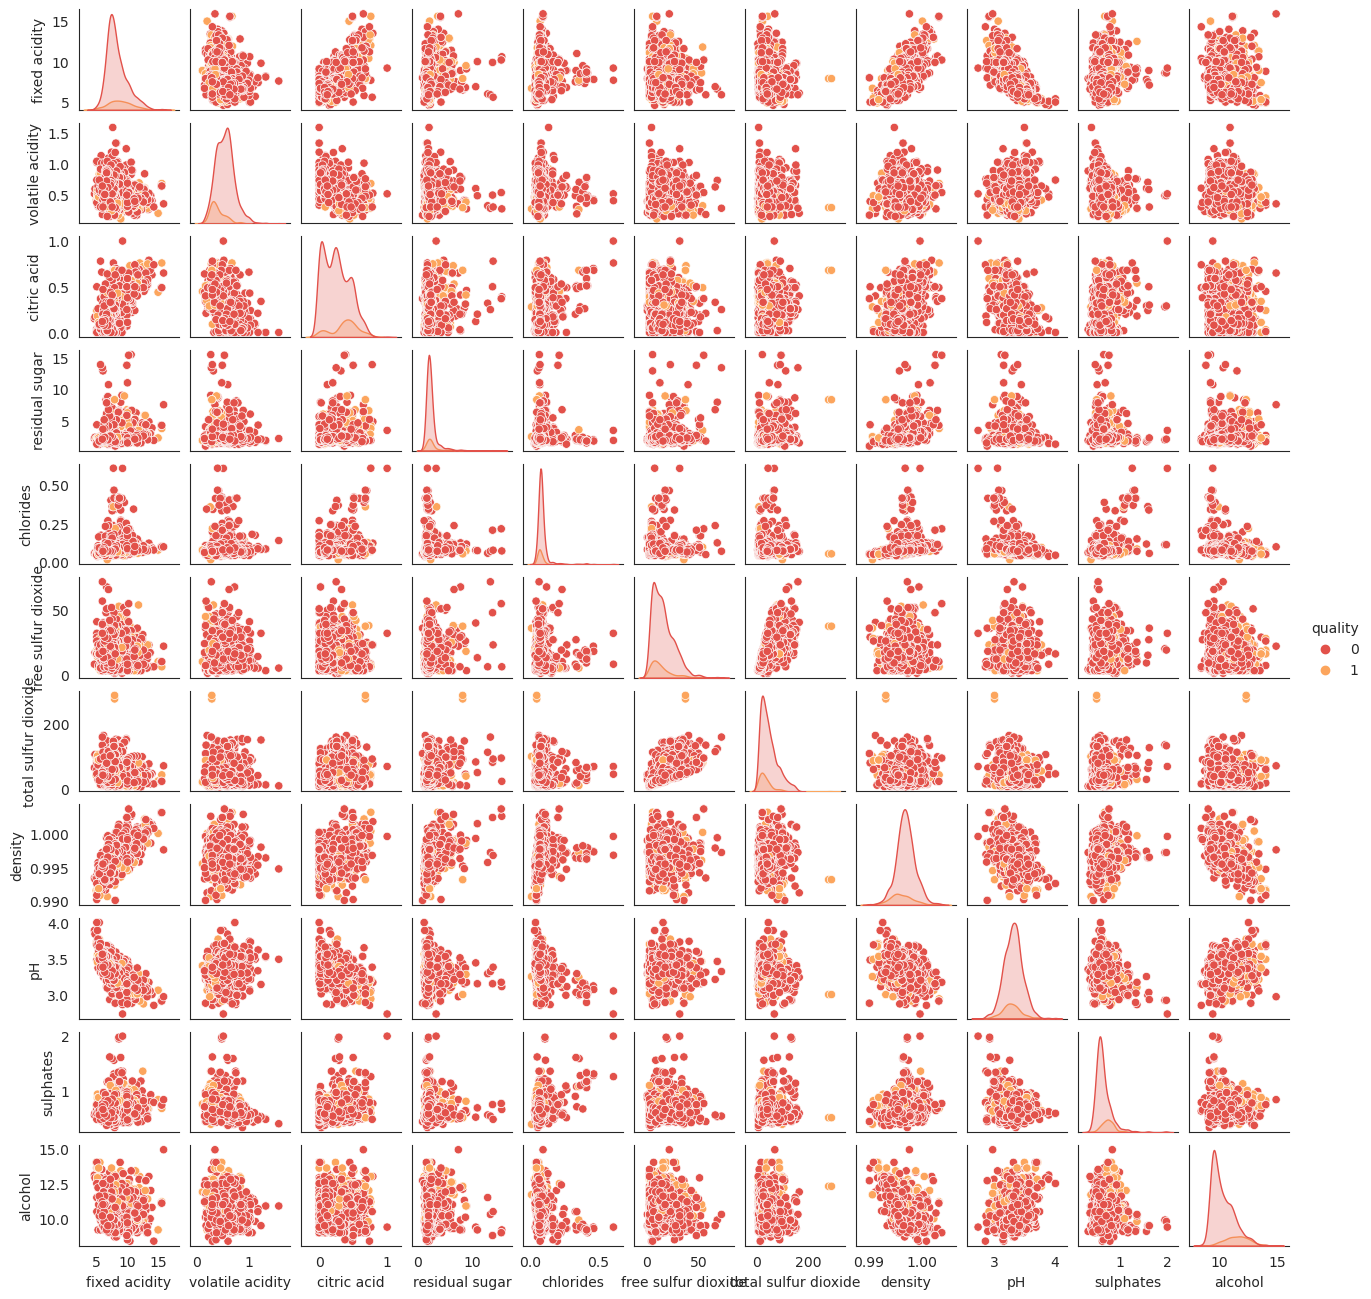

In [25]:
sns.pairplot(df, hue='quality', palette=palette, size=1.2, diag_kind = 'kde')
plt.show()

<a id="dataPrep"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>4. Preprocessing</em> </span></h2>
</div>

<a id="dataPrep_fScale"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>4. 1. Feature Scaling</em> </span></h3>
</div>

Lets scale the variables in range

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_smote)

<a id="dataPrep_split"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>4. 2. Train, test split</em> </span></h3>
</div>

Lets split it into Train and test variable

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

<a id="model"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. Models</em> </span></h2>
</div>

<a id="model1"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 1. Decision Tree</em> </span></h3>
</div>

In [28]:
from sklearn.tree import DecisionTreeClassifier
DT_classifer = DecisionTreeClassifier()
DT_classifer.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
DT_y_pred = DT_classifer.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {:0.2%}'. format(accuracy_score(y_test, DT_y_pred)))

Model accuracy score with criterion entropy: 90.59%


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, DT_y_pred)

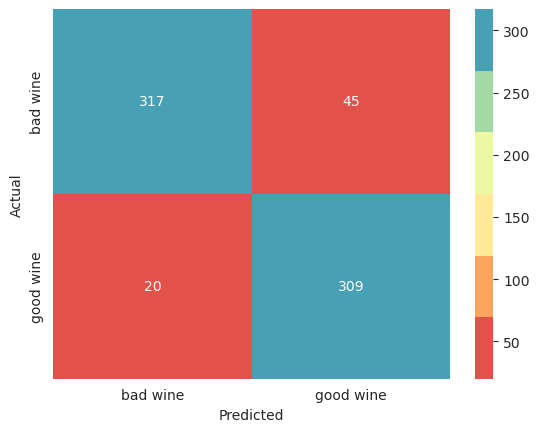

In [32]:
labels=['bad wine', 'good wine']

sns.heatmap(cm, cmap=palette, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<a id="model2"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 2. Random Forest</em> </span></h3>
</div>

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rf_y_pred = rf_classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

# acc = format(accuracy_score(y_test, y_pred)
print('Model accuracy score with criterion entropy: {:0.2%}'. format(accuracy_score(y_test, rf_y_pred)))

Model accuracy score with criterion entropy: 93.34%


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_y_pred)

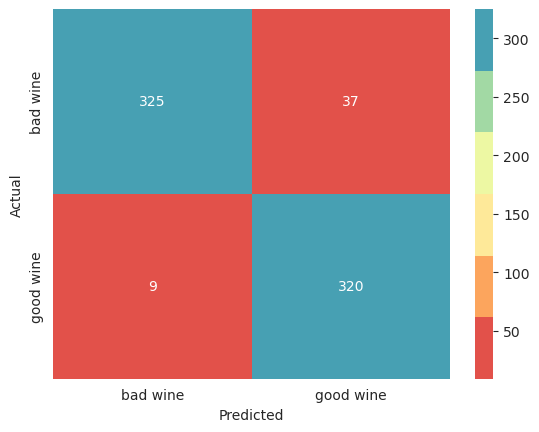

In [37]:
labels=['bad wine', 'good wine']

sns.heatmap(cm, cmap=palette, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<a id="model3"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 3. Cross Validation Score</em> </span></h3>
</div>

In [38]:
from sklearn.model_selection import cross_val_score
model_names, cv_scores = [], []

<a id="model3a"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:80%; padding:20px 0">
    <h4> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 3. a. <strong>Logistic Regression</strong> Cross Validation Accuracy score</em> </span></h4>
</div>

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)

model_names.append("Logistic Regression")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Logistic Regression Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Logistic Regression Cross Validation Accuracy score: 81.96%


<a id="model3b"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:80%; padding:20px 0">
    <h4> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 3. b. <strong>Decision Tree Classifier</strong> Cross Validation Accuracy score</em> </span></h4>
</div>

In [40]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
model_names.append("Decision Tree Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Decision Tree Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Decision Tree Classifier Cross Validation Accuracy score: 88.66%


<a id="model3c"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:80%; padding:20px 0">
    <h4> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 3. c. <strong>Random Forest Classifier</strong> Cross Validation Accuracy score</em> </span></h4>
</div>

In [41]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
model_names.append("Random Forest Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('Random Forest Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Random Forest Classifier Cross Validation Accuracy score: 93.01%


<a id="model3d"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:80%; padding:20px 0">
    <h4> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 3. d. <strong>Xgboost Classifier</strong> Cross Validation Accuracy score</em> </span></h4>
</div>

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
model_names.append("Xgboost Classifier")
cv_scores.append(str(round(cv.mean()*100, 2)) + " %")
print('xgboost Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

xgboost Classifier Cross Validation Accuracy score: 92.67%


<a id="model3e"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:80%; padding:20px 0">
    <h4> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 3. e. <strong>Model Scores</strong> using Cross Validation  score</em> </span></h4>
</div>

In [43]:
model_names, cv_scores

model_acc_cv_df = pd.DataFrame(list(zip(model_names,cv_scores)), columns=["Model", "CV Score"])
model_acc_cv_df.index = np.arange(1, len(model_acc_cv_df)+1)
model_acc_cv_df

,Model,CV Score
1,Logistic Regression,81.96 %
2,Decision Tree Classifier,88.66 %
3,Random Forest Classifier,93.01 %
4,Xgboost Classifier,92.67 %


<a id="model4"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 4. Voting Classifier</em> </span></h3>
</div>

In [44]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr), ('dt',dt), ('rf',rf), ('xgb',xgb)], voting = 'soft') 

In [45]:
voting_clf

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),
                             ('dt', DecisionTreeClassifier(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, ma

In [46]:
cv = cross_val_score(voting_clf, X_train, y_train, cv=5)
print('Voting Classifier Cross Validation Accuracy score: {:0.2%}'. format(cv.mean()))

Voting Classifier Cross Validation Accuracy score: 92.43%


<a id="model5"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:90%; padding:20px 0">
    <h3> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 5. Grid Search CV</em> </span></h3>
</div>

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

<a id="model5a"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:80%; padding:20px 0">
    <h4> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 5. a. <strong>Random Forest Classifier</strong> using Grid Search CV</em> </span></h4>
</div>

In [49]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.9242558640358535
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


<a id="model5b"></a>
<div style="background:url(https://i.imgur.com/enymh3w.png) no-repeat; background-size:80%; padding:20px 0">
    <h4> <span style="font-family: 'Jura', sans-serif !important;"> <em>5. 5. b. <strong>Xgboost Classifier</strong> using Grid Search CV</em> </span></h4>
</div>

In [50]:
xgb = XGBClassifier(random_state =1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train, y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.9290809615272686
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.6}


<a id="conclusion"></a>
<div style="background:url(https://i.imgur.com/sxM8yrh.png) no-repeat; background-size:contain; width:100%; padding:20px 0">
    <h2> <span style="font-family: 'Jura', sans-serif !important;"> <em>6. Conclusion</em> </span></h2>
</div>

<p style="text-align:center"><img src="https://media.tenor.com/NUGNhk0Eh64AAAAi/thank-you-thanks.gif"></p>
<br><br>
<p style="text-align:center; font-weight:600; font-size:18px"><em>Thankyou! For viewing this Notebook, do upvote if you liked it. Please feel free to provide any feedback!… </em>😄<br>
<img src="https://i.imgur.com/ugj24t1.png" style="width:30%">
</p>

<br><br>
